# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [101]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [102]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape[0:2]

# TODO: How many unique classes/labels there are in the dataset.
import numpy as np
unique_train = np.unique(y_train)
unique_test = np.unique(y_test)

n_classes = len(np.unique([unique_train , unique_test]))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

### Exploratory Visualization

The training dataset consists of a bunch of tracks of 30 images each one, corresponding to the same video for a certain signal.
Training data set has 39.209 images grouped in groups of 30 (and a missing one for a certain track).
In total there are 43 classes of signal types and each class have different amount of tracks, hence, different number of images. We can find some classes, like 0 or 19, with few images and other with lots.
In the following distribution plot we can see the amount of images for each class, for training and test data, and we can see that classes are not balanced within each dataset, although both sets have similar distribution for each class. <br>
In the next section, I have plotted some of the tracks for a certain signals, with the corresponding label <br>
And in the last picture from the Exploration section, I have plotted one random track for each label or class.

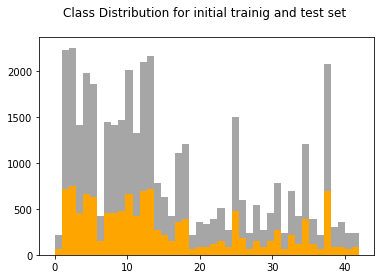

In [103]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
# Class distributions for train and test:

plt.hist(y_train, bins=n_classes, color = 'grey', alpha = 0.7)    
plt.hist(y_test,  bins=n_classes, color = 'orange') 
plt.title('Class Distribution for initial trainig and test set \n')
plt.show()


In [104]:
# There is an empty image in position 30*1122+29, that we will fill with a duplicte 
# heree we insert a missing image at index 30*1122+29
if (X_train.shape[0] == 39209):
    X_train = np.insert(X_train,30*1122+29, X_train[30*1122+28], axis=0)
    y_train = np.insert(y_train,30*1122+29, y_train[30*1122+28], axis=0)

Here we see 5 complete tracks of 30 images each one: 


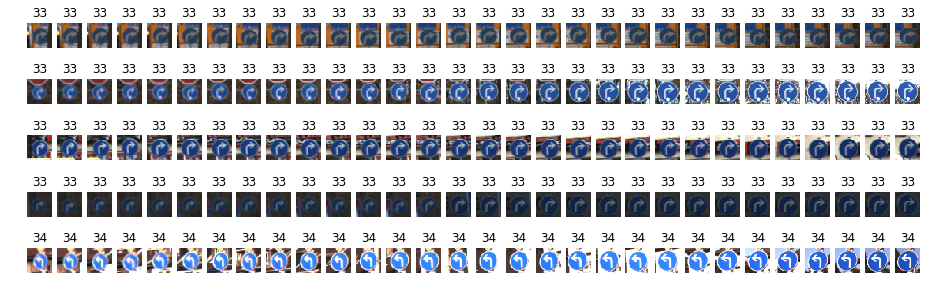

In [4]:
fig, axes = plt.subplots(5, 30, figsize=(16,5))

print('Here we see 5 complete tracks of 30 images each one: ')
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    ax.imshow(X_train[(30*1122)+i])
    ax.set_title(y_train[(30*1122)+i])
plt.show()


In [105]:
import random
import numpy as np
classes = list(set(y_train))

# here we generate a clsses_index dictionary, which conatins all index for any class
# here we will keep original training set ordered!
def get_index_classes(y_train):
    ci = {}
    for i,x in enumerate(y_train):
        if x not in ci:
            ci[x]=[i]
        else:
            ci[x].append(i)
    #for c in classes:
    #    random.shuffle(ci[c])
    return ci

classes_index = get_index_classes(y_train)


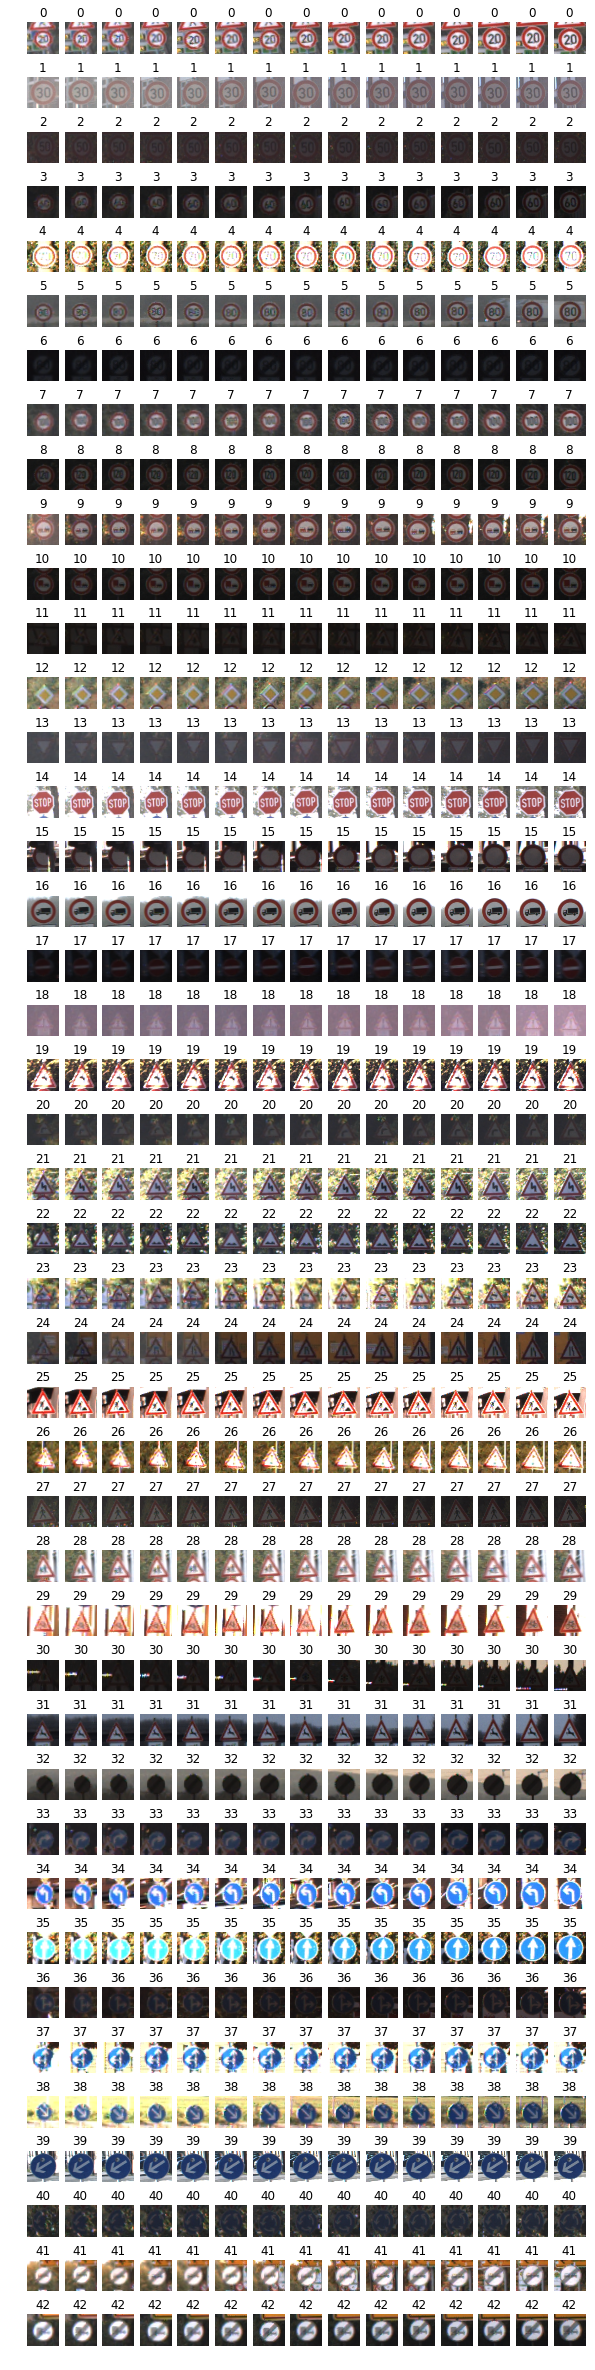

In [5]:
#print a few examples of each class (each class is one row)
img_per_row = 15
fig, axes = plt.subplots(n_classes, img_per_row, figsize=(10,n_classes))
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    ax.imshow(X_train[classes_index[int(i/img_per_row)][i % img_per_row]])
    ax.set_title(y_train[classes_index[int(i/img_per_row)][i % img_per_row]])
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.


In [ ]:

# Values for translation, rotation and scaling can be drawn from a uniform distribution in a specified range, 
#i.e. ±T % of the image size for translation, 1±S/100 for scaling and ±R◦ for rotation.
# Additionally, we build a jittered dataset by adding 5
# transformed versions of the original training set, yielding
# 126,750 samples in total. 



In [127]:
# Function to perform Rotations and perspective Transformation
def get_random_rotation(image_data):
    rows,cols = image_shape 
    M = cv2.getRotationMatrix2D((cols/2+random.randint(-2,2),
                                 rows/2+random.randint(-2,2)),random.uniform(-10,10),1)
    dst = cv2.warpAffine(image_data,M,(cols,rows))
    return(dst)

def get_random_perspective_transformation(image_data):
    rows,cols = image_shape
    pts1 = np.float32([[0.+random.uniform(0., 2.),0+random.uniform(0., 2.)],
                   [32-random.uniform(0., 2.),0+random.uniform(0., 2.)],
                   [0+random.uniform(0., 2.),32-random.uniform(0., 2.)],
                   [32-random.uniform(0., 2.),32-random.uniform(0., 2.)]])
    pts2 = np.float32([[0,0],[32,0],[0,32],[32,32]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(image_data,M,(cols,rows))
    return(dst)

Here we see Random examples for rotations in training set: 


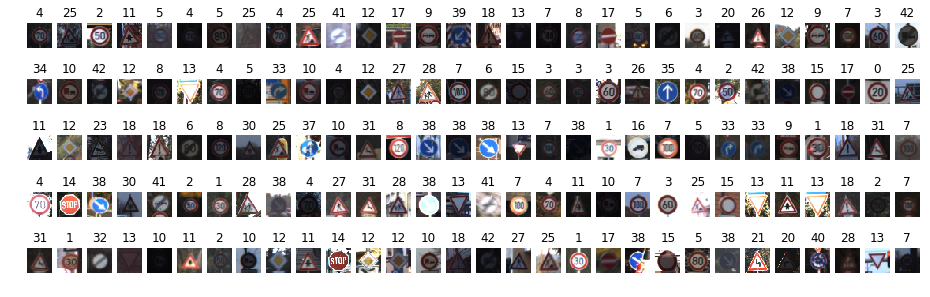

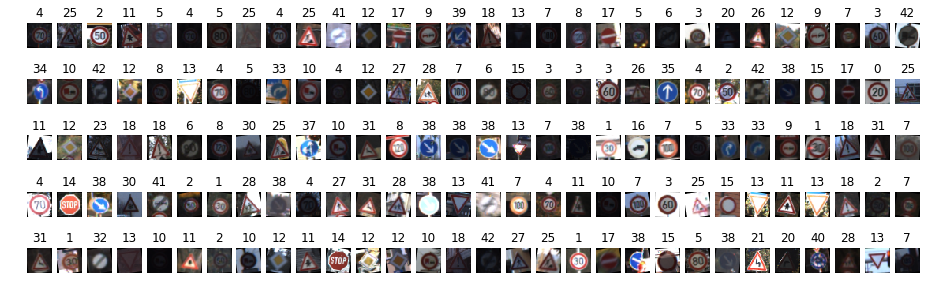

In [128]:
# PLOT some EXAMPLE OF ROTATIONS
X_rotations = np.empty_like(X_train)
for row in range(X_train.shape[0]):
    X_rotations[row,:,:,:] = get_random_rotation(X_train[row])

fig, axes = plt.subplots(5, 30, figsize=(16,5))
choice = []
print('Here we see Random examples for rotations in training set: ')
for i, ax in enumerate(axes.flat):
    index = index = random.randint(0, len(X_train))
    choice.append(index)
    ax.set_axis_off()
    img = X_train[index]
    label = y_train[index]
    ax.imshow(img)
    ax.set_title(label)   
plt.show()

fig, axes = plt.subplots(5, 30, figsize=(16,5))
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    img = X_rotations[choice[i]]
    label = y_train[choice[i]]
    ax.set_title(label)
    ax.imshow(img)
    
plt.show()

Here we see Random examples for Perspective Transformations on training set: 


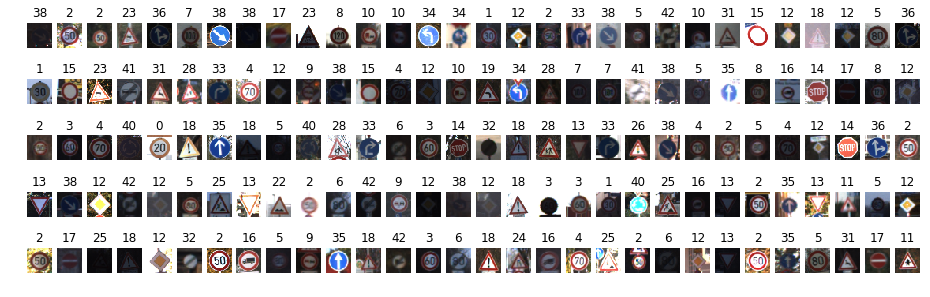

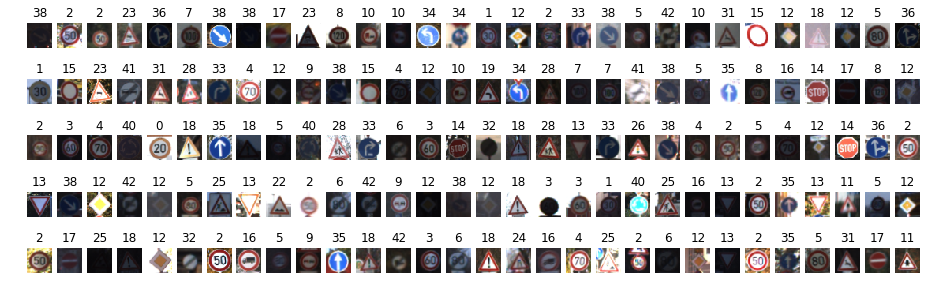

In [39]:
# PLOT some EXAMPLE FOR PERSPECTIVE TRANSFORMATION

X_transformation = np.empty_like(X_train)
for row in range(X_train.shape[0]):
    X_transformation[row,:,:,:] = get_random_perspective_transformation(X_train[row])

fig, axes = plt.subplots(5, 30, figsize=(16,5))
choice = []
print('Here we see Random examples for Perspective Transformations on training set: ')
for i, ax in enumerate(axes.flat):
    index = index = random.randint(0, len(X_train))
    choice.append(index)
    ax.set_axis_off()
    img = X_train[index]
    label = y_train[index]
    ax.imshow(img)
    ax.set_title(label)   
plt.show()

fig, axes = plt.subplots(5, 30, figsize=(16,5))
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    img = X_transformation[choice[i]]
    label = y_train[choice[i]]
    ax.set_title(label)
    ax.imshow(img)
    
plt.show()

In [107]:
import cv2
def normalize(image_data):
    # Converting image to LAB Color model----------------------------------- 
    lab= cv2.cvtColor(image_data, cv2.COLOR_BGR2LAB)
    # Splitting the LAB image to different channels-------------------------
    l, a, b = cv2.split(lab)
    # Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(3,3))
    cl = clahe.apply(l)
    # Merge the CLAHE enhanced L-channel with the a and b channel-----------
    limg = cv2.merge((cl,a,b))
    # Converting image from LAB Color model to RGB model--------------------
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return(final)


In [108]:
X_normalized = np.empty_like(X_train)
for row in range(X_train.shape[0]):
    X_normalized[row,:,:,:] = normalize(X_train[row])

Here we see 5 complete tracks of 30 images each one: 


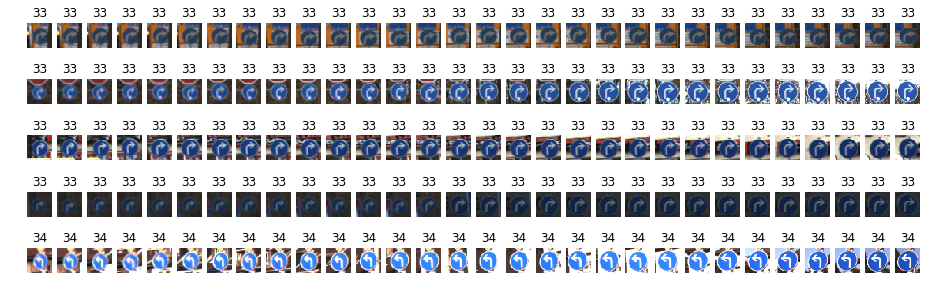

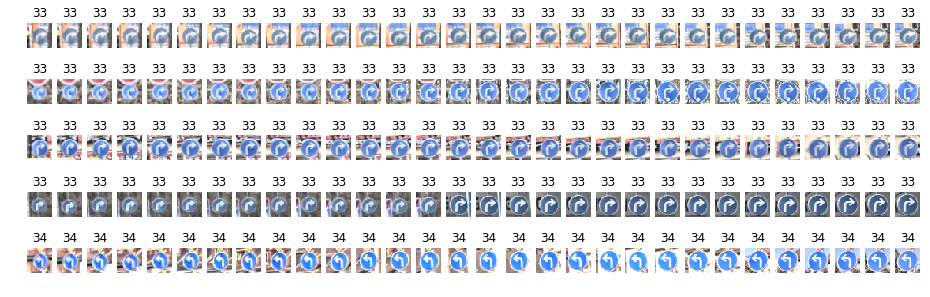

In [82]:
# Example for Applying normalization method Contrast-limited Adaptive Histogram Equalization (CLAHE)
fig, axes = plt.subplots(5, 30, figsize=(16,5))
print('Here we see 5 complete tracks of 30 images each one: ')
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    img = X_train[(30*1122)+i]
    label = y_train[(30*1122)+i]
    ax.imshow(img)
    ax.set_title(label)   
plt.show()

fig, axes = plt.subplots(5, 30, figsize=(16,5))
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    img = X_train[(30*1122)+i]
    label = y_train[(30*1122)+i]
    ax.set_title(label)
    final = normalize(img)
    ax.imshow(final)
    
plt.show()

In [6]:
# ANOTHER OPTION. Normalize the data features to the variable X_normalized
#def normalize(image_data):
#    a = 0.
#    b = 1.
#    grayscale_min = 0
#    grayscale_max = 255
#    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )


In [7]:
# In the case i don't want to normalize data, lt's just put:
#X_normalized = X_train

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Following review feedback, I have improved pre-processing steps. <br>
In first iteration the only thing I did was scaling values as floating point from 0.0 to 1.0.
I have tried new things that have improved a bit my previous results: <br>
- Applying Contrast-limited Adaptive Histogram Equalization techinque (CLAHE), on training set, I have improved contrast in images, that was specially bad in many images. That technique is suitable for improving the local contrast and enhancing the definitions of edges in each region of an image. That's is done in a function called normalize() <br>
- A part from that, I have worked in some transformation functions to enrich training set with same images randomly perturbed. Some options were to try with translations, rotations and scaling. <br>
The reasoning behind that was to add small perturbations in order to get a more robust network, able to handle potential deformations in the test set.
Finally, I have worked in random rotations of [-10,+10] degrees, that helped to get better results. And a perspective transformation function that is not really improving the learning process and I have finally discarded.

In [ ]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [129]:
# First approach: divide in a balanced way for each class, in order to keep same proportions of classes in both data sets,
# traning and validation. we can do it with StratifiedShuffleSplit from sklearn.cross_validation.

#from sklearn.cross_validation import StratifiedShuffleSplit
#sss = StratifiedShuffleSplit(y_train,2, test_size=0.05, random_state=0)

# Divide X_train, y_train into X_train_reduced, y_train_reduced, X_val, y_val:
#for train_index, test_index in sss:
#    X_train_reduced, X_val = X_normalized[train_index], X_normalized[test_index]
#    y_train_reduced, y_val = y_train[train_index], y_train[test_index]

#print('Num of elements for new training data set: ', X_train_reduced.shape[0])
#print('Num of elements for validation data set: ', X_val.shape[0])



In [111]:
## Second approach, and finally the chosen:
## Mixing all images at random and subsequently separating into training and validation will result in very similar sets, 
## and will not accurately predict performance on the unseen test set.
## Here, We extract 1 track at random per class for validation, yielding 1,290 samples for validation and 25,350 for training.
import random
##WARNING ENSURE y_train is not yet randomized!!!

#np.unique(y_train,return_counts=True) [1] 
index = random.randint(0, len(X_train))
index_validation = []
#X_normalized = X_train

for key in classes_index:
    num_pic = len(classes_index[key])
    first_index = min(classes_index[key])
    num_tracks = num_pic / 30
    #print(key, 'Num pic in that class: ', num_pic, 'Num of tracks: ', num_tracks)
    #randomly select a bucket
    bucket = random.randint(0,num_tracks-1)    
    # Choose all elements of bucket selected for validation set:
    index_validation = index_validation + [i for i in range(bucket*30 + first_index, bucket*30+first_index+30)]

index_original_train = [i for i in range(0,n_train)]
index_training = np.delete(index_original_train, index_validation)
print(len(index_validation))
print(len(index_training))
X_train_reduced, X_val = X_normalized[index_training], X_normalized[index_validation]
y_train_reduced, y_val = y_train[index_training], y_train[index_validation]

print('Shape for new Training set: ',X_train_reduced.shape )
print('Shape for new validation set: ', X_val.shape)

1290
37919
Shape for new Training set:  (37919, 32, 32, 3)
Shape for new validation set:  (1290, 32, 32, 3)


In [112]:
# Applying  rotations and transformations to each training and validation set:
#---------------------------------------------------------------------------
   
X_train_reduced_rotations = np.empty_like(X_train_reduced)
for row in range(X_train_reduced.shape[0]):
    X_train_reduced_rotations[row,:,:,:] = get_random_rotation(X_train_reduced[row])

X_train_reduced_transformation = np.empty_like(X_train_reduced)
for row in range(X_train_reduced.shape[0]):
    X_train_reduced_transformation[row,:,:,:] = get_random_perspective_transformation(X_train_reduced[row])

# Finally, just taking rotations
X_train_reduced = np.concatenate((X_train_reduced, X_train_reduced_rotations), axis=0)
y_train_reduced = np.concatenate((y_train_reduced, y_train_reduced), axis=0)

# Applying transformations and rotations to validation set: 
X_val_reduced_rotations = np.empty_like(X_val)
for row in range(X_val.shape[0]):
    X_val_reduced_rotations[row,:,:,:] = get_random_rotation(X_val[row])

X_val_reduced_transformation = np.empty_like(X_val)
for row in range(X_val.shape[0]):
    X_val_reduced_transformation[row,:,:,:] = get_random_perspective_transformation(X_val[row])

# Finally, just taking rotations
X_val = np.concatenate((X_val, X_val_reduced_rotations), axis=0)
y_val = np.concatenate((y_val, y_val), axis=0)

print('Dimension for the new training set: ', X_train_reduced.shape, y_train_reduced.shape)
print('Dimension for the new validation set: ', X_val.shape,y_val.shape)

Dimension for the new training set:  (75838, 32, 32, 3) (75838,)
Dimension for the new validation set:  (2580, 32, 32, 3) (2580,)


In [114]:
# In case X_train was not normalized before
#X_train_norm = np.empty_like(X_train_reduced)
#for row in range(X_train_reduced.shape[0]):
#    X_train_norm[row,:,:,:] = normalize(X_train_reduced[row])
#X_train_reduced = X_train_norm

#X_val_norm = np.empty_like(X_val)
#for row in range(X_val.shape[0]):
#    X_val_norm[row,:,:,:] = normalize(X_val[row])
#X_val = X_val_norm

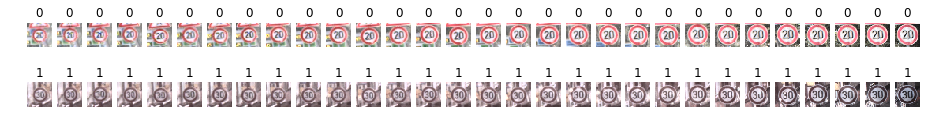

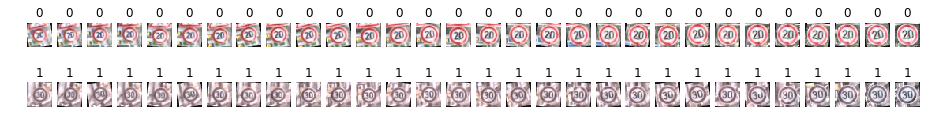

In [115]:
# Here we have a sample of the validation set, where we can verify that we have the normalized picture, and the same with some rotation
rep = 1290
fig, axes = plt.subplots(2, 30, figsize=(16,2))
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    img = X_val[(0)+i]
    label = y_val[(0)+i]
    ax.imshow(img)
    ax.set_title(label)   
plt.show()

fig, axes = plt.subplots(2, 30, figsize=(16,2))
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    img = X_val[(0 + rep)+i]
    label = y_val[(0 + rep)+i]
    ax.set_title(label)
    final = normalize(img)
    ax.imshow(final)
    
plt.show()



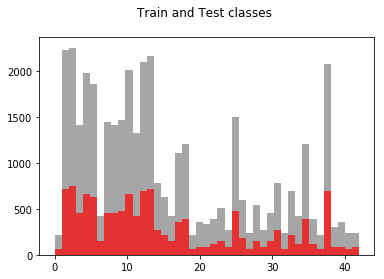

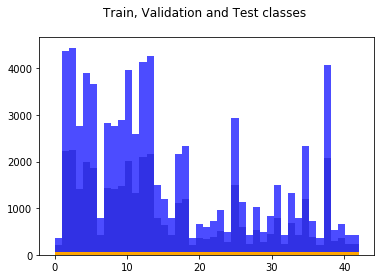

In [116]:
# Oringinal train and test data:
plt.hist(y_train, bins=n_classes, color = 'grey', alpha = 0.7)    
plt.hist(y_test,  bins=n_classes, color = 'red', alpha = 0.7)  
plt.title('Train and Test classes \n')
plt.show()

plt.hist(y_train, bins=n_classes, color = 'grey', alpha = 0.7) 
plt.hist(y_train_reduced, bins=n_classes, color = 'blue', alpha = 0.7)    
plt.hist(y_val,  bins=n_classes, color = 'orange')   
plt.title('Train, Validation and Test classes \n')
plt.show()

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

My first approach to split the original training set into a new training and a validation one was to take the 10% (or even the 5%)to a validation set, with StratifiedShuffleSplit, from sklearn.cross_validation, that returns stratified randomized folds made preserving the percentage of samples for each class. <br>
The main problem with that approach is that due to the data set composition, batches of 30 pictures very similar, shuffling and splitting stratified samples into training and validation set imply getting very similar sets that will not accurately predict
performance on the unseen test set. <br>

Following the described technique in the paper mentioned in that project (http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf), I have selected randomly one full batch of images for each of the classes that become my validation set.
Thus, my validation sets contains 30 images (of the same track) for each 43 classes, that's a total of 1290 images. <br>

Once obtained the training and validation set (with 37919 and 1290 elements respectively), I have obtained duplicated sets for each one with random rotations for each image.
I have joined both sets (CLAHE equalized images and rotated images) to generate a bigger training and validating set with 75838 and 2580 elements each one.


In [117]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
### FIRST ARQUITECTURE: LeNet
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    #Dropout
    conv1 = tf.nn.dropout(conv1, keep_prob)
    
    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    #Dropout
    conv2 = tf.nn.dropout(conv2, keep_prob)
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

### Model Arcuitecture <br>
My proposal architecture is based in LeNet model, adding some dropout steps after each convolutional layer in order to reduce the possible overfitting. <br>
The final model has the following Layers: <br>
<ul>
<li>Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6. </li>
<li>Dropout with keeping probability of 0.8 </li>
<li>RELU Activation </li>
<li>Pooling. Input = 28x28x6. Output = 14x14x6, </li>
<br>
<li>Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16. </li>
<li>Dropout with keeping probability of 0.8</li>
<li>RELU Activation </li>
<li>Pooling. Input = 10x10x16. Output = 5x5x16. </li>
<li>Flatten. Input = 5x5x16. Output = 400. </li>
<br>
<li>Layer 3: Fully Connected. Input = 400. Output = 120. </li>
<li>RELU Activation </li>
<br>
<li>Layer 4: Fully Connected. Input = 120. Output = 84. </li>
<li>RELU Activation </li>
<br>
<li>Layer 5: Fully Connected. Input = 84. Output = 43.</li>
<li>RELU Activation </li>
</ul>



In [89]:
### Train your model here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [118]:
rate = 0.001
EPOCHS = 100
BATCH_SIZE = 128 #256

logits = LeNet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [119]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):

    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Training...

Model saved
[0.11007751937984496, 0.32635658896246622, 0.51162790716156481, 0.58100775203039479, 0.71434108531752294, 0.72286821705426352, 0.75620155020277624, 0.75968992248062017, 0.80310077556343962, 0.82170542635658916, 0.83953488390575082, 0.85077519379844957, 0.81976744223010634, 0.83604651144308639, 0.85813953479131067, 0.85697674400122592, 0.85465116269828734, 0.85310077537861906, 0.86899224787719487, 0.84651162827661797, 0.85620155057241754, 0.86782945754916174, 0.8651162788849468, 0.86240310068278347, 0.87015503885210022, 0.88100775189177938, 0.8841085275014241, 0.86782945736434114, 0.88062015494634938, 0.86279069767441863, 0.85775193807690642, 0.86046511590942854, 0.85891472870527308, 0.88837209330048672, 0.90387596880742749, 0.86860465097797013, 0.85658914728682167, 0.87829457366651342, 0.86550387606140256, 0.85581395349414768, 0.8833333331485127, 0.88217054272806916, 0.8775193798449612, 0.84031007770420041, 0.84961240310077524, 0.88217054263565886, 0.8821705425

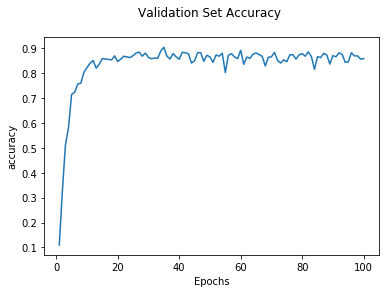

In [120]:
from sklearn.utils import shuffle
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_reduced)
    
    print("Training...")
    print()
    val_accuracy=[]
    for i in range(EPOCHS): 

        X_train_reduced, y_train_reduced = shuffle(X_train_reduced, y_train_reduced) 
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_reduced[offset:end], y_train_reduced[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_val, y_val)
        #print("EPOCH {} ...".format(i+1))
        val_accuracy.append(validation_accuracy)
        #print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        #print()
        
    saver.save(sess, 'lenet')
    print("Model saved")
    print(val_accuracy)
    epochs = [i for i in range(1,EPOCHS+1)]
    plt.plot(epochs,val_accuracy)
    plt.ylabel('accuracy')
    plt.xlabel('Epochs')
    plt.title('Validation Set Accuracy \n')
    plt.show()

Here we see some images from test set and its normalized part: 


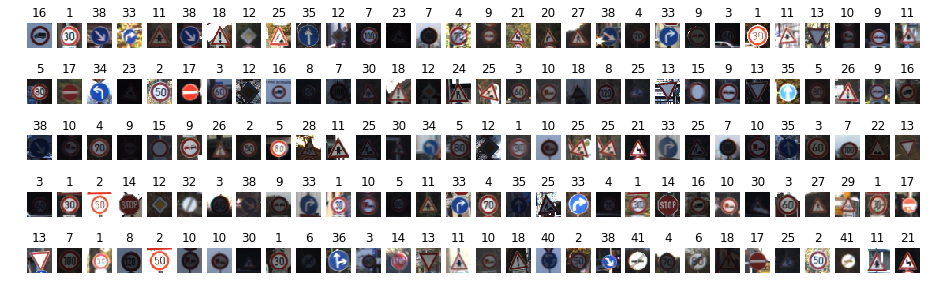

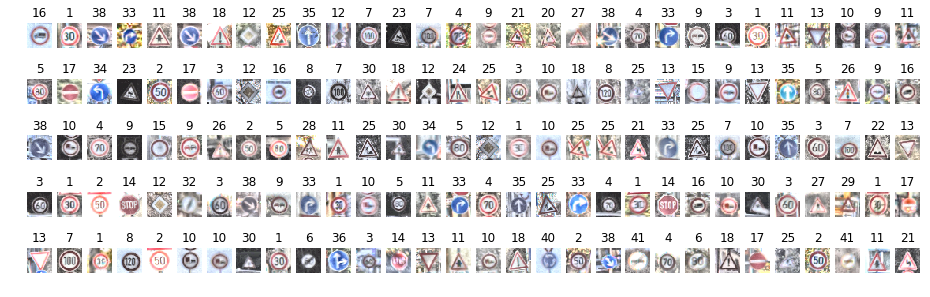

In [93]:
X_normalized_test = np.empty_like(X_test)
for row in range(X_test.shape[0]):
    X_normalized_test[row,:,:,:] = normalize(X_test[row])
    
fig, axes = plt.subplots(5, 30, figsize=(16,5))
print('Here we see some images from test set and its normalized part: ')
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    img = X_test[i]
    label = y_test[i]
    ax.imshow(img)
    ax.set_title(label)   
plt.show()

fig, axes = plt.subplots(5, 30, figsize=(16,5))
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    img = X_normalized_test[i]
    label = y_test[i]
    ax.set_title(label)
    final = normalize(img)
    ax.imshow(final)
    
plt.show()

In [121]:
#EVALUATE THE MODEL WITH TEST SET:
#X_normalized_test = normalize(X_test)

X_normalized_test = np.empty_like(X_test)
for row in range(X_test.shape[0]):
    X_normalized_test[row,:,:,:] = normalize(X_test[row])

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_normalized_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.934


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Model Training
- There were different parameters to chose: Epochs, learning rate, batch_size and keep_prob (that indicates the percentage of units that will be kept after the convulotional layer <br>
- I used Adam optimization with learning rates of 0.001 that seemed working fine, after trying some higher.
- I used small batches of 128, although tried 256 and 1024
- Regarding epochs, I have seen that having more iterations than 100 doesn't improve much the model, and probably drives to overfit the model, so I have decided to stop at 100.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

My approach was to start with a known model LeNet, already applied in many problems, among others, for handwritting recognition, machine-printed character recognition, on-line handwritting recognizion or face recognition.

With that basic arcuitecture I have followed different steps to select a final solution:

- Regarding the model architecture, the main difference I have added are dropouts after each convolutional layer, in order to reduce overfitting, and trying to contribute to make the model better at generalizing beyond the training data. I have not added in the table below data obtained with the basic LeNet without dropout. <br>After some trials, I have selected keeping probability of 0.8 for training purposes and 1.0 for evaluating the model.

- A second step trying to improve the model has been work deeper in pre-processing, where I tried different things:
    - Scaling dataset
    - Applying Contrast-limited Adaptive Histogram Equalization technique(CLAHE)
    - Data augmentation: An overfitting net can generally be made to perform better by using more training data. We can artificially increase the number of training examples by applying transformations, adding noise etc. In that case I have tried with rotations and perspective transformations. As an aside effect, duplicating training and validation set reduces the training speed for the model quite significantly
   
- Another step that has made some difference is how to split training and validation set in order to to build a meaningful validation set. As explained before, for special characteristics of the data set, making just a stratified split, keeping balanced class proportions between training and data set ended up in very similar data sets. I tried here two approaches:
1. whether using StratifiedShuffleSplit 
2. Removing randomly one entire track of 30 images per each class (track extraction) to form the validation set

- And finally, some simple grid search for hyperparameters, especially dropout probabilties, batch size, and learning rates.

In the following table I have added accuarcy obtained for different model and variations implemented, where we can see that the model (with hyperparameters already fixed) that gives best test and extra data accuracy is the combination:
LeNet + dropout
CLAHE equialization
Augmented training set with rotations
Track extraction to validation/
training set

<table>
  <tbody>
    <tr>
      <th>Model and main characteristics</th>
      <th>
        <p>Training accuracy</p>
      </th>
      <th>
        <span> Test accuracy</span>
      </th>
      <th>Extra sample accuracy</th>
      <th>Comments</th>
    </tr>
    <tr>
      <td>
        <span>LeNet + Dropout</span>
        <br/>
        <span>Pre-processing: just scaling training and testing set </span>
      </td>
      <td>0.865</td>
      <td>
        <span>0.918</span>
      </td>
      <td>
        <span>0.6</span>
      </td>
      <td> </td>
    </tr>
    <tr>
      <td>
        <span>LeNet + </span>
        <span>dropout<br/>CLAHE equialization<br/>with StratifiedShuffleSplit at 5%</span>
      </td>
      <td>0.980</td>
      <td>0.921</td>
      <td>0.4</td>
      <td>Highly overfitted<br/>due to very similar valodation<br/>and training set </td>
    </tr>
    <tr>
      <td colspan="1">
        <span>LeNet + </span>
        <span>dropout<br/>CLAHE equialization<br/>with track extraction to validation/<br/>training set</span>
      </td>
      <td colspan="1">0.889</td>
      <td colspan="1">0.933</td>
      <td colspan="1">0.6</td>
      <td colspan="1"> </td>
    </tr>
    <tr>
      <td colspan="1">
        <span>LeNet + </span>
        <span>dropout<br/>CLAHE equialization<br/>Augmented training set with rotations<br/>Track extraction to validation/<br/>training set</span>
      </td>
      <td colspan="1">0.85</td>
      <td colspan="1">0.934</td>
      <td colspan="1">0.6</td>
      <td colspan="1">FINAL MODEL</td>
    </tr>
    <tr>
      <td colspan="1">
        <span>LeNet + </span>
        <span>dropout<br/>CLAHE equialization<br/>Augmented training set with rotations<br/>and Perspective Transformation<br/>Track extraction to validation/<br/>training set</span>
      </td>
      <td colspan="1">0.829</td>
      <td colspan="1">0.891</td>
      <td colspan="1">0.4</td>
      <td colspan="1">Adding <span>Perspective Transformation<br/>doesn't improve the model! </span>
      </td>
    </tr>
    <tr>
      <td colspan="1">
        <span>LeNet + </span>
        <span>dropout<br/>CLAHE equialization<br/>Augmented training set with rotations<br/>and Perspective Transformation<br/>
          <span>training splitting with StratifiedShuffleSplit at 5%</span>
          <br/>
        </span>
      </td>
      <td colspan="1">0.927</td>
      <td colspan="1">0.849</td>
      <td colspan="1">0.4</td>
      <td colspan="1">worst results:<ul style="list-style-type: square;">
          <li>Very similar training and validation sets</li>
          <li>with perspective transformations, <br/>that doesn't works  well</li>
        </ul>
      </td>
    </tr>
  </tbody>
</table>

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

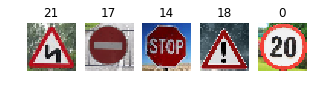

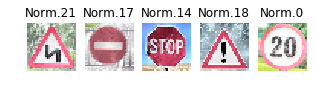

In [134]:
### Load the images and plot them here.

### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg
import scipy.ndimage
import cv2


fig, axes = plt.subplots(1,5, figsize=(5, 1))

new_labels = [21,17,14,18,0]
new_images = np.empty((len(new_labels),32,32,3), dtype=np.uint8)


for i, img in enumerate(['pic1.jpg','pic2.jpg','pic3.jpg','pic4.jpg','pic5.jpg']):
    image = scipy.ndimage.imread(img)
    image = cv2.resize(image,(32,32))
    axes[i].axis('off')
    axes[i].imshow(image)
    axes[i].set_title(new_labels[i])
    #print('This image is:', type(image), 'with dimesions:', image.shape)
    new_images[i]=image[:,:,:3]
    
fig, axes = plt.subplots(1,5, figsize=(5, 1))
for i, img in enumerate(['pic1.jpg','pic2.jpg','pic3.jpg','pic4.jpg','pic5.jpg']):
    image = scipy.ndimage.imread(img)
    image = cv2.resize(image,(32,32))
    axes[i].axis('off')
    axes[i].imshow(normalize(image))
    axes[i].set_title('Norm.'+ str(new_labels[i]))
    #print('This image is:', type(image), 'with dimesions:', image.shape)
    new_images[i]=image[:,:,:3]


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I have chosen 5 candidates showed just above: <br>
(21 - Double curve)  <br>
(17 - No entry) <br>
(14 - stop) <br>
(18 - General Caution) <br>
(0 - Speed limit (20km/h)) <br>
And I don't really see aspects that could make the classification difficult. Images are clear and lighted.
The thing that I could highlight is that 5th one, the 20km/h-speed limit, practically take up all the image, making harder to detect the edges or end-points of the signal shape. It might be a problem when looking for features in small patches.

In [123]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
#EVALUATE THE MODEL WITH TEST SET:
#X_normalized_new_images = normalize(new_images)

X_normalized_new_images = np.empty_like(new_images)
for row in range(new_images.shape[0]):
    X_normalized_new_images[row,:,:,:] = normalize(new_images[row])

#X_normalized_new_images = new_images
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_normalized_new_images, np.array(new_labels))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.600


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

### Performance on New Images
The performance of the model in these 5 new images is worse than in the original test set: 0.6 vs 0.92.
It just predicts correctly 3 out of 5 ! <br>
The double curve warning message results confused by some other triangular-type classe, specialy when images have low light quality (for example, class 30)
I have taken a picture of a very clear and bright 20Km/h-speed limit that ends bad classified most of the times. I suspect that it has something to do with the fact that class 0, 20Km/h-speed limit signals, is the smallest in the data set. <br>

I think that the problem are not the new images, but the model. Possible way to improve that model limitation:
- To add more data (training pictures) into all these classes, considering using transformed versions from original pictures, like random perturbations in positions  ([-2,2] pixels), slightly in scale and rotation.
- Treat light in the preprocessing images
- Try a complex model, like that explained in the paper, where the output of each convulotional is not just fed into the next layer, but also directly into the final classifier. In that way, the classifier not just has high-level features, but also pooled low level features, ensuring achieving more accurate predictions.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [124]:
softmax = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_output = sess.run(softmax, feed_dict={x: X_normalized_new_images, keep_prob: 1})
    my_top_k = sess.run(tf.nn.top_k(softmax_output, k=3))
    

**Answer:**

Following, we have the array of probabilities for each image. The model is pretty certain with 3 pictures  and not much for the last one and the first, that are also bad classified. <br>
For the first picture, that belongs to class 21, we can see that the model doesn't classify it correctly with first option, but it does sometimes in second option in some occasions (that current last iteration is not the case, though). <br>
The same is not happening for the 5th one, which is badly classified for all 3 main predictions, always. <br>
After that, we can see each picture with a group of picture belonging to training set for the class that has been predicted.
We can compare picture 1 and picture 5 with some examples of the group has been labeled to. <br>
The problems classifying last picture, belonging to class 0 might be related with the fewer training data that we have for that certain class. Possibly adding more samples could improve something that situation.

In [125]:
# Array with probabilities:
my_top_k[0]

array([[  2.39380479e-01,   1.87912270e-01,   7.24332035e-02],
       [  9.99999762e-01,   1.27948795e-07,   5.94338871e-08],
       [  9.99848843e-01,   1.51147979e-04,   3.96993816e-09],
       [  9.99901175e-01,   9.62968261e-05,   1.47258208e-06],
       [  4.49539661e-01,   4.06488091e-01,   6.86656088e-02]], dtype=float32)

In [130]:
# Array with indices:
my_top_k[1]

array([[18, 11, 28],
       [17, 14, 12],
       [14, 17, 22],
       [18, 27, 26],
       [40,  1,  8]], dtype=int32)

Original images and correct labels: 


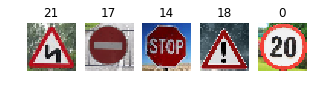

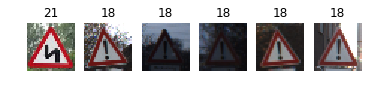

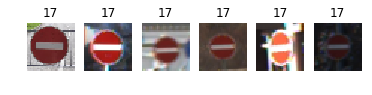

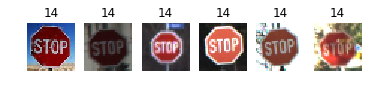

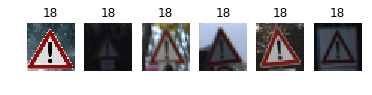

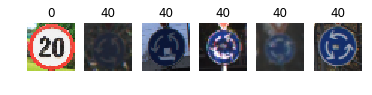

In [137]:
fig, axes = plt.subplots(1,5, figsize=(5, 1))
new_labels = [21,17,14,18,0]
predicted_labels = [e[0] for e in my_top_k[1]]
original_pic = ['pic1.jpg','pic2.jpg','pic3.jpg','pic4.jpg','pic5.jpg']

print('Original images and correct labels: ')
for i, img in enumerate(original_pic):
    image = scipy.ndimage.imread(img)
    image = cv2.resize(image,(32,32))
    axes[i].axis('off')
    axes[i].imshow(image)
    axes[i].set_title(new_labels[i])
    new_images[i]=image[:,:,:3]


for i,label in enumerate(predicted_labels):
    key = predicted_labels[i]
    index = classes_index[key]
    index_sample = random.sample(index,5)
    fig, axes = plt.subplots(1, 6, figsize=(6,1))

    img = original_pic[i]
    image = scipy.ndimage.imread(img)
    image = cv2.resize(image,(32,32))
    axes[0].set_axis_off()
    axes[0].imshow(image)
    axes[0].set_title(new_labels[i])

    for k, index_number in enumerate(index_sample):

        axes[k+1].set_axis_off()
        axes[k+1].imshow(X_train[index_number])
        axes[k+1].set_title(y_train[index_number])


In [28]:
# Number of elements in each class for the initial trining set:
np.unique(y_train,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8),
 array([ 210, 2220, 2250, 1410, 1980, 1860,  420, 1440, 1410, 1470, 2010,
        1320, 2100, 2160,  780,  630,  420, 1110, 1200,  210,  360,  330,
         390,  510,  270, 1500,  600,  240,  540,  270,  450,  780,  240,
         690,  420, 1200,  390,  210, 2070,  300,  360,  240,  240]))

Here we see some complete tracks for validation set: 


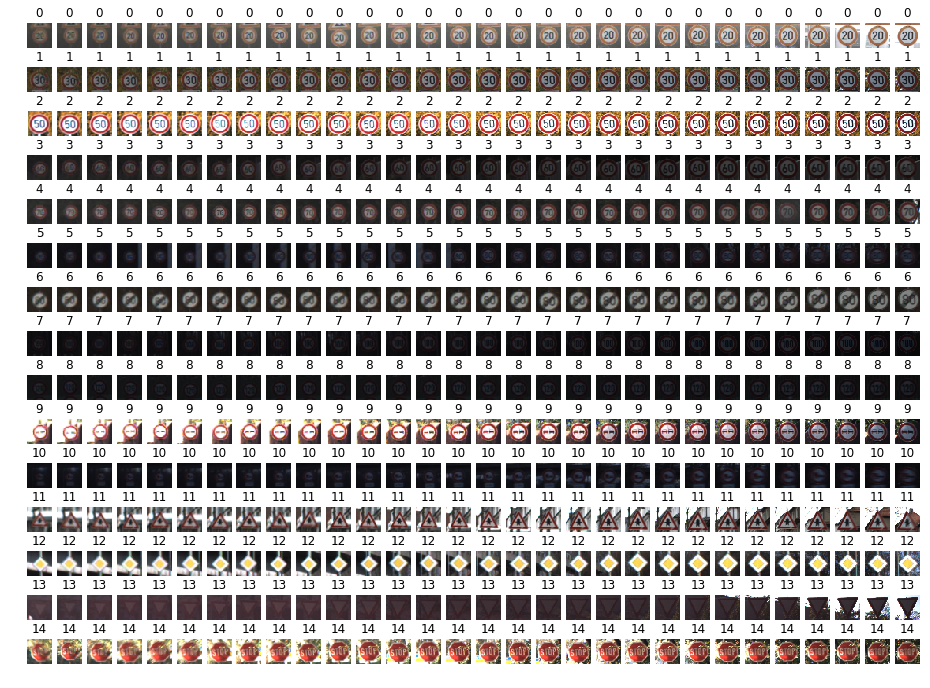

In [22]:
fig, axes = plt.subplots(15, 30, figsize=(16,12))
print('Here we see some complete tracks for validation set: ')
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    ax.imshow(X_val[(30*0)+i])
    ax.set_title(y_val[(30*0)+i])
plt.show()

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.